In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

from torch.utils.data import DataLoader

from src.dataset import Mitosis_Training_Dataset, Mitosis_Validation_Dataset

In [3]:
# set dirs
sqlite_file = 'annotations/MIDOG.sqlite'
image_dir = '/home/ammeling/data/images_training/'

In [4]:
train_dataset = Mitosis_Training_Dataset(sqlite_file, image_dir)
val_dataset = Mitosis_Validation_Dataset(sqlite_file, image_dir)

Initializing slide objects: 100%|██████████| 150/150 [00:00<00:00, 407.93it/s]


In [5]:
train_dataset.summarize()


Number of slides: 150
Number of mitosis: 1721
Number of imposter: 2714


In [62]:
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=True)

In [63]:
def show_batch(batch, n_cols=3, figsize=(5, 5)):
    images, targets = batch
    images = images.permute(0, 2, 3, 1)
    n_images = images.shape[0]
    n_cols = n_cols
    n_rows = int(np.ceil(n_images / n_cols))
    fig, axs = plt.subplots(ncols=n_cols, nrows=n_rows, figsize=figsize)
    for idx, ax in enumerate(axs.flatten()):
        img = images[idx]
        lbl = targets[idx].item()
        ax.imshow(img)
        ax.axis('off')
        ax.set_title(lbl)
    plt.tight_layout()
    plt.show()

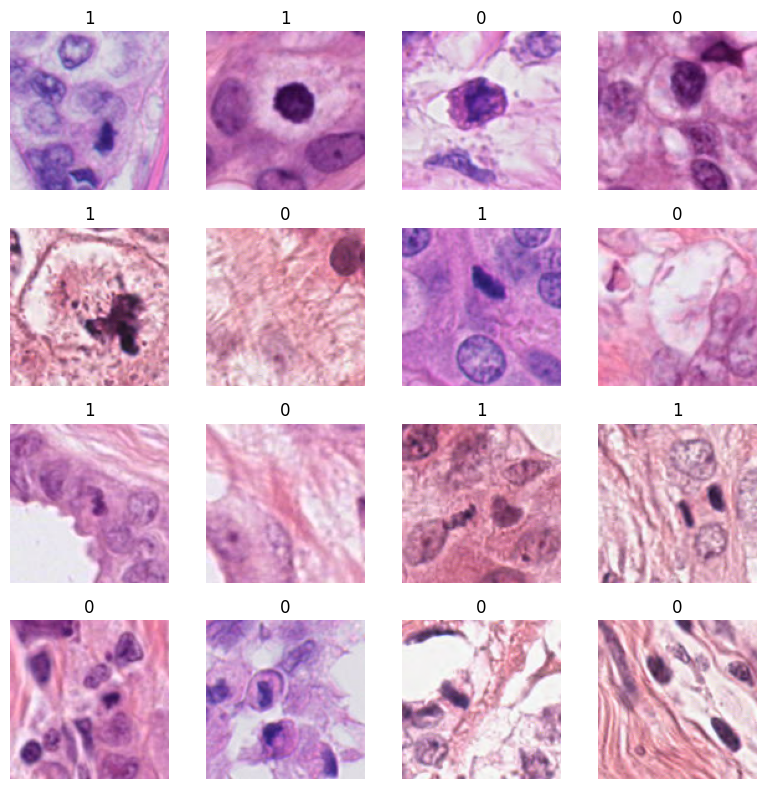

In [71]:
for batch in train_loader:
    show_batch(batch, n_cols=4, figsize=(8,8))
    break

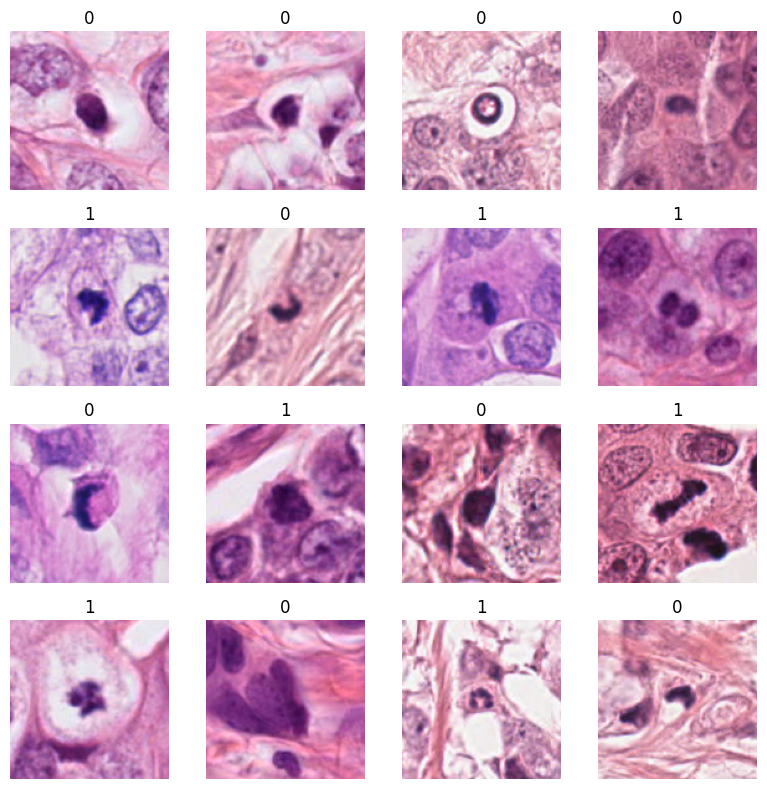

In [65]:
for batch in val_loader:
    show_batch(batch, n_cols=4, figsize=(8,8))
    break